<a href="https://colab.research.google.com/github/ealeongomez/Reinforcement-Learning/blob/main/Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Instalaciones**

-
-


In [1]:
!apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
!pip install -q -U tf-agents pyvirtualdisplay gym[atari]

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-securi

In [2]:
# Basis libraries
import numpy as np
from matplotlib import pyplot as plt

# Deep Learning libraries
import tensorflow as tf 
from tensorflow import keras


#**Reinforcenment Learning**

El aprendizaje por refuerzo es una area de ML que tiene como objeto mapear situaciones de un entorno dinámico e incierto, que logren maximizar recompensas y minimecen "castigos" que puedan tenerse.



- Agente: es un software que realiza "observaciones" y reliza "acciones"  dentro de una situación en particular.

- El agente puede recibir "recompensas" y "castigos". Sin embargo, el agente actuá en el entorno y aprende mediante prueba y error, donde maximiza las recomepnsas y minimiza los castigos.

- El agente lo que se denomina como "politica", para determinar las acciones a realizar en el entorono dinámico e incierto.





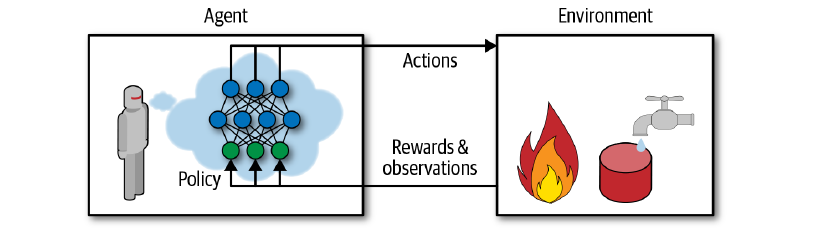

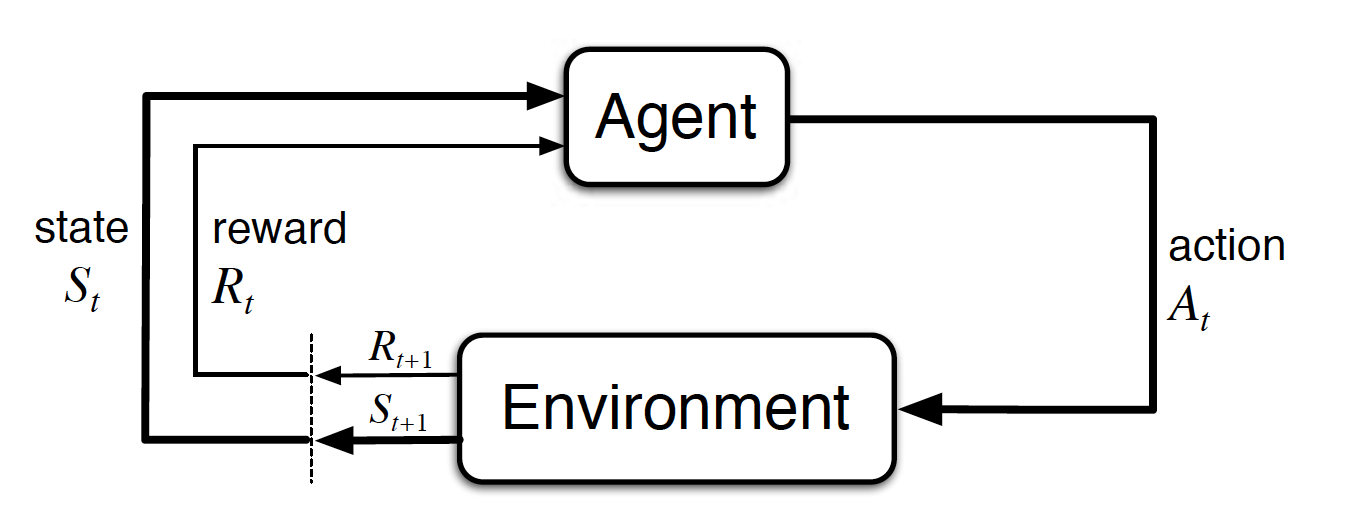

#**OpenAI Gym**

Uno de los retos de aprendizaje reforzado es lograr crear un entorno funcional con las características dinámicas e inciertas, que permitan entrenar a nuestro agente. OpenAI Gym es basicamente un kit de herramientas con multiplicidad de entornos simulados en juegos de Atari, juegos de mesa, simulaciones físicas en 2d y 3d, etc.


In [3]:
# Instlación de OpenAI Gym
!pip install -U gym

Requirement already up-to-date: gym in /usr/local/lib/python3.7/dist-packages (0.18.3)


In [4]:
import gym 

env = gym.make('CartPole-v1')
obs = env.reset()

In [5]:
"""
  obs[0]: posición horizontal del carro
  obs[1]: velocidad del carro
  obs[2]: angulo del pose
  obs[3]: velocidad angular
"""
print(obs)

[ 0.04900372  0.01816306  0.02577513 -0.01198938]


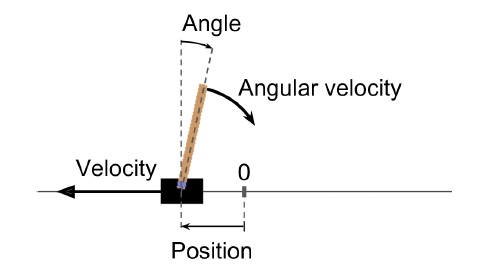

<img src="https://github.com/ealeongomez/Data/blob/main/CartPole-v1.gif?raw=true" width="500">

In [6]:
import pyvirtualdisplay
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

print(display)    

**NOTA**: Si se utiiza servidores sin pantalla como una máquina virtual o servicios en la nube, la reproducción fallará, es por eso que usamos las instlaciones del principio donde se usa un servidor X falso como Xvfb o Xdummy.

In [7]:
env.render() 

True

(400, 600, 3) [ 0.04900372  0.01816306  0.02577513 -0.01198938]


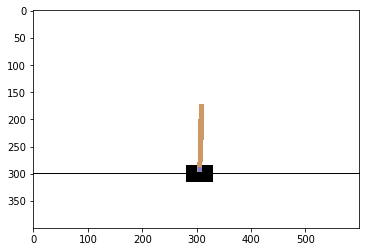

In [8]:
img = env.render(mode="rgb_array")
print(img.shape, obs)

plt.imshow(img, interpolation='nearest')
plt.show()

In [9]:
# Acciones posibles en el entorno
env.action_space

Discrete(2)

[ 0.04936698  0.21290606  0.02553534 -0.29642981] 1.0 False {}


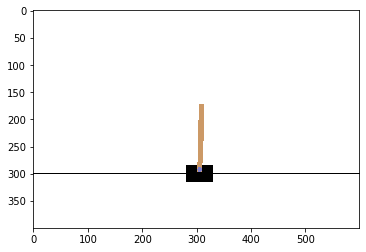

In [10]:
""" 
    Posibles acciones: (0) aceleración a la izquierda y (1) aceleración a la derecha 
    step: ejecuta las acción
          obs: nueva observación
          reward: en este entorno se recibe una recomepsa de 1.0 en cada paso
          done: este valor sera True cuando acabe el episodio
          info: diccionario de información disponible 
"""     
action = 1 
obs, reward, done, info = env.step(action)

print(obs, reward, done, info)

img = env.render(mode="rgb_array")
plt.imshow(img, interpolation='nearest')
plt.show()

Con la acción el carro se esta moviendo a izquierda $(obs[1]>0)$, pero con velocidad angular negativa $(obs[3]<0)$, lo cual es probable que se meva hacia la izquierda despues del siguientwe paso 

In [11]:
 def basic_policy(obs):
   """
    Politica que acelera el carro hacia la izquierda cuando el poste de este tenga un movimiento hacia izquierda y caso contrario 
   """
   angle = obs[2]
   return 0 if angle < 0 else 1

In [12]:
totals = []
for episode in range(500):
  episode_rewards = 0
  obs = env.reset()
  for step in range(200):
    action = basic_policy(obs)
    obs, reward, done, info = env.step(action)
    episode_rewards += reward
    if done: 
      break
  
  totals.append(episode_rewards)


In [13]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(41.902, 9.246426120399168, 24.0, 68.0)

#**Neural Network Policies**

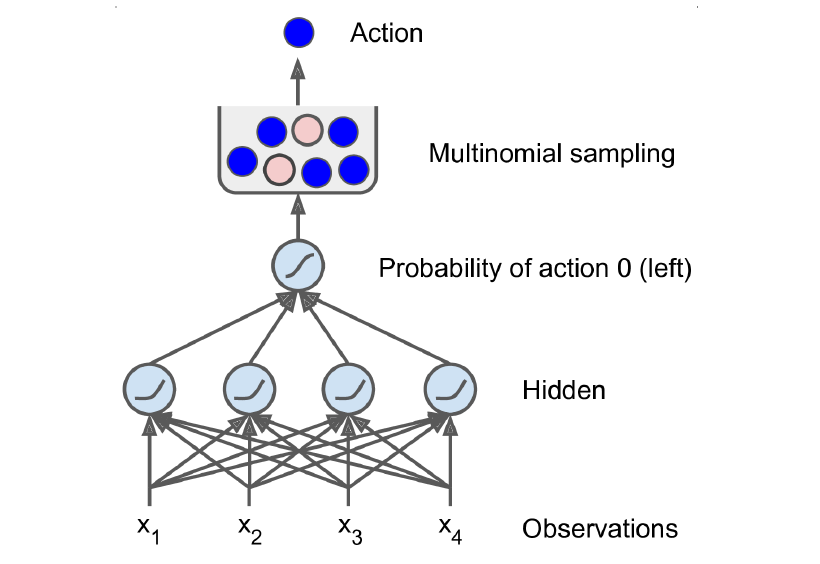

In [14]:
n_inputs = env.observation_space.shape[0] # Número de observaciones 

model = keras.models.Sequential([
    keras.layers.Dense(5, activation='elu', input_shape=[n_inputs]), 
    keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Problema de asignación de crédito**

Si el agente logra equilibrar el poste en los primeros 100 pasos debemos 
planterna debemos palntearnos la pregunta: ¿Cómo se puede saber cuáles de esas 100 acciones llevadas a cabo ha sido efectivas y cuales no han sido efectivas?

A lo anterios se le conoce como Problema de asignación de crédito, el cual consiste en determinar cuales son aquellas acciones del agente que conducen a un resultado determinado.



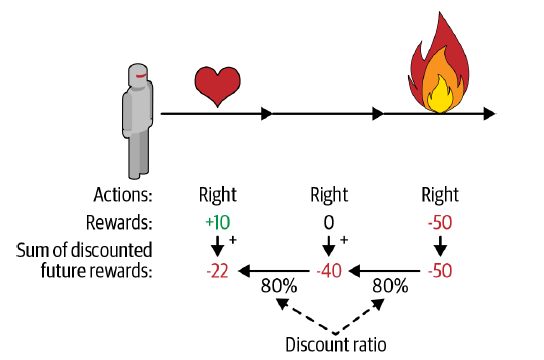

$\gamma$ se llama factor de descuenco, ahora supongamos que Si $\gamma=0.8$, entonces tendremos que: 

$$10 \; + \; \gamma \; x \; 0 \; + \; \gamma^{2} \; x \; (-50) = -22$$

Casos: 

- $\gamma=0$, las recompensas futuras no contarán mucho en comparación con las recomepsas inmediatas.

- $\gamma=1$, las recomepsas futuras contarán tanto como las recompensas inmediatas



**Policy Gradients**

Son algoritmos que óptimizan los parámetros de una politica siguiendo a los gradientes hacia recompensas más altas. 

Variante del algoritmo Reinforce: 

1. El algoritmo juega varias veces y en cada paso es calculada la acción elegida más probable.
2. Iterado varios episodios, es calculado la ventaja en cada una de las acciones 
3. 
4. Es calculado la media de todos los vectores de gradientes resultantes y esta es usada para el paso de gradiente descendente


In [15]:
def play_one_step(env, obs, model, loss_fn):
  with tf.GradientTape() as tape:
    left_proba = model(obs[np.newaxis])
    action = (tf.random.uniform([1, 1]) > left_proba)
    y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
    loss = tf.reduce_mean(loss_fn(y_target, left_proba))
    
  grads = tape.gradient(loss, model.trainable_variables)
  obs, reward, done, info = env.step(int(action[0, 0].numpy()))
  return obs, reward, done, grads

In [16]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
  all_rewards = []
  all_grads = []
  for episode in range(n_episodes):
    current_rewards = []
    current_grads = []
    obs = env.reset()

    for step in range(n_max_steps):
      obs, reward, done, grads = play_one_step(env, obs, model, loss_fn)
      current_rewards.append(reward)
      current_grads.append(grads)
      if done:
        break
    all_rewards.append(current_rewards)
    all_grads.append(current_grads)

  return all_rewards, all_grads

In [17]:
def discount_rewards(rewards, discount_factor):
  discounted = np.array(rewards)
  for step in range(len(rewards) - 2, -1, -1):
    discounted[step] += discounted[step + 1] * discount_factor
  
  return discounted

In [18]:
def discount_and_normalize_rewards(all_rewards, discount_factor):
  
  all_discounted_rewards = [discount_rewards(rewards, discount_factor) for rewards in all_rewards]
  flat_rewards = np.concatenate(all_discounted_rewards)
  reward_mean = flat_rewards.mean()
  reward_std = flat_rewards.std()
  
  return [(discounted_rewards - reward_mean) / reward_std for discounted_rewards in all_discounted_rewards]

In [19]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_factor = 0.95

In [20]:
optimizer = keras.optimizers.Adam(lr=0.01)
loss_fn = keras.losses.binary_crossentropy

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [21]:
for iteration in range(n_iterations):
  all_rewards, all_grads = play_multiple_episodes(
  env, n_episodes_per_update, n_max_steps, model, loss_fn)
  all_final_rewards = discount_and_normalize_rewards(all_rewards,
  discount_factor)
  all_mean_grads = []

  for var_index in range(len(model.trainable_variables)):
    mean_grads = tf.reduce_mean(
        [final_reward * all_grads[episode_index][step][var_index]
         for episode_index, final_rewards in enumerate(all_final_rewards)
         for step, final_reward in enumerate(final_rewards)], axis=0)
    all_mean_grads.append(mean_grads)
  optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

